In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import xarray
plt.style.use("bmh")

import gnss_tid.synthetic
import gnss_tid.parameter

center = xarray.DataArray([100, 100], dims=["ci"])
wavelength = 350.0
phase_speed = 200.0
period = wavelength * 1000 / (60 * phase_speed)
print(period)

data = gnss_tid.synthetic.constant_model(
    center=xarray.DataArray([0, 0], dims=["ci"]),
    wavelength=wavelength,
    phase_speed=phase_speed,
    xlim=(-1500, 1500),
    ylim=(-1500, 1500),
    snr=-3,
    hres=20,
)
data["image"] = data["image"].rolling(x=3, y=3, center=True, min_periods=1).median()

# file = "outputs/2024-12-06/22-20-41/autofocus.h5"
# # data = xarray.open_dataset(file)

params, tau, patches = gnss_tid.parameter.estimate_parameters_block(data)

29.166666666666668
snr = -3, noise_factor = np.float64(0.998814876483345)
valid patches for wavelength FFT: 224.59504132231405
valid patches for tau FFT: 224.2982456140351
valid phase speeds: 224.2982456140351


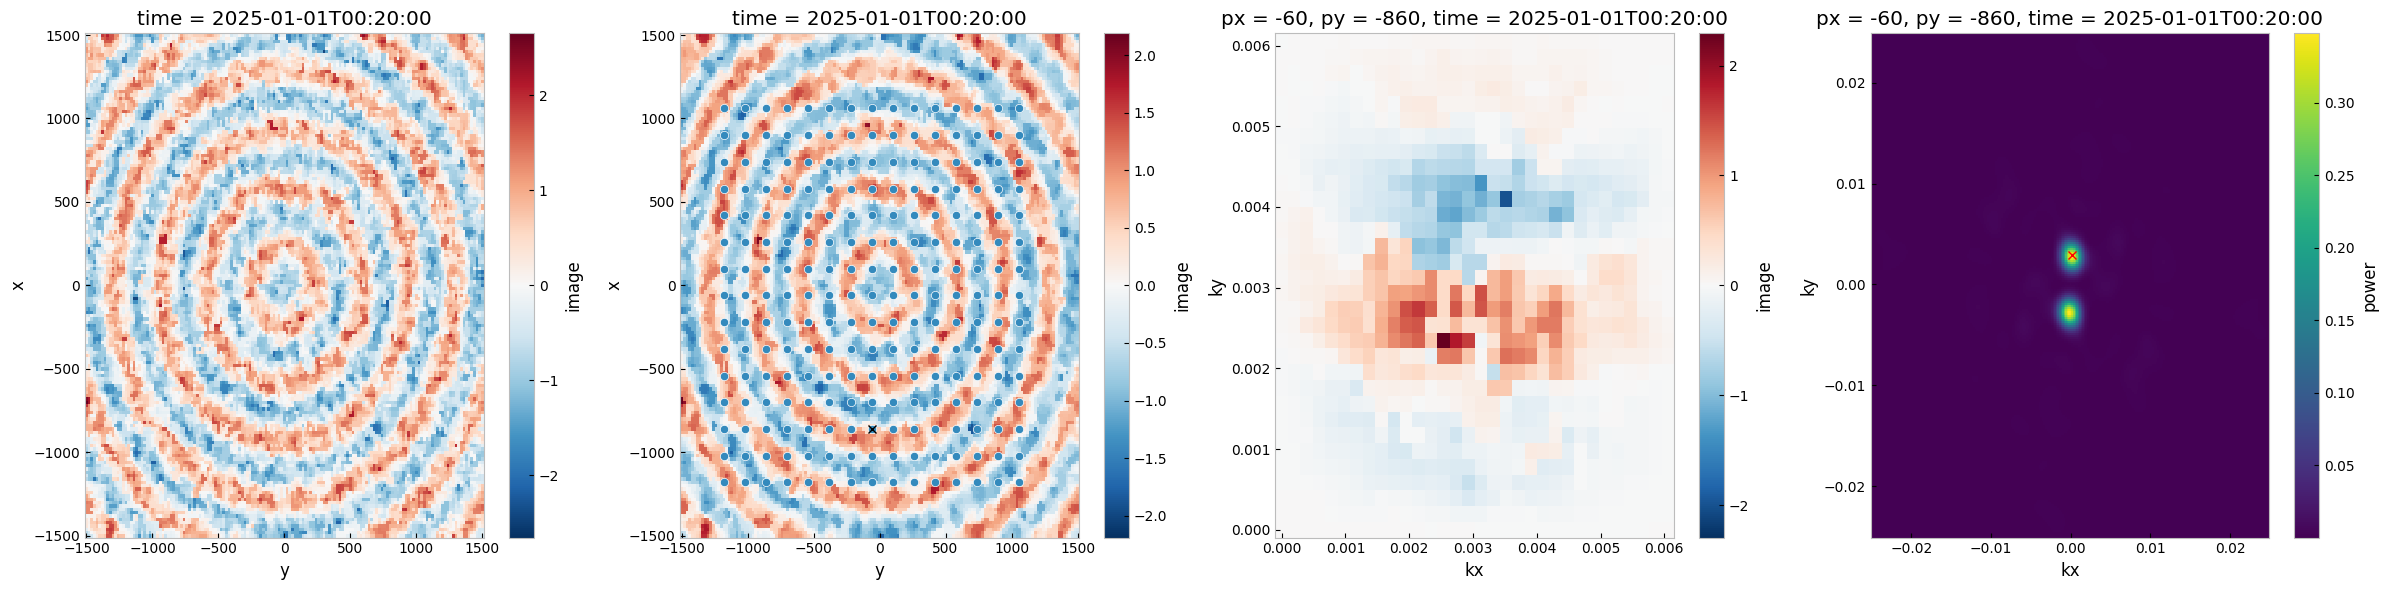

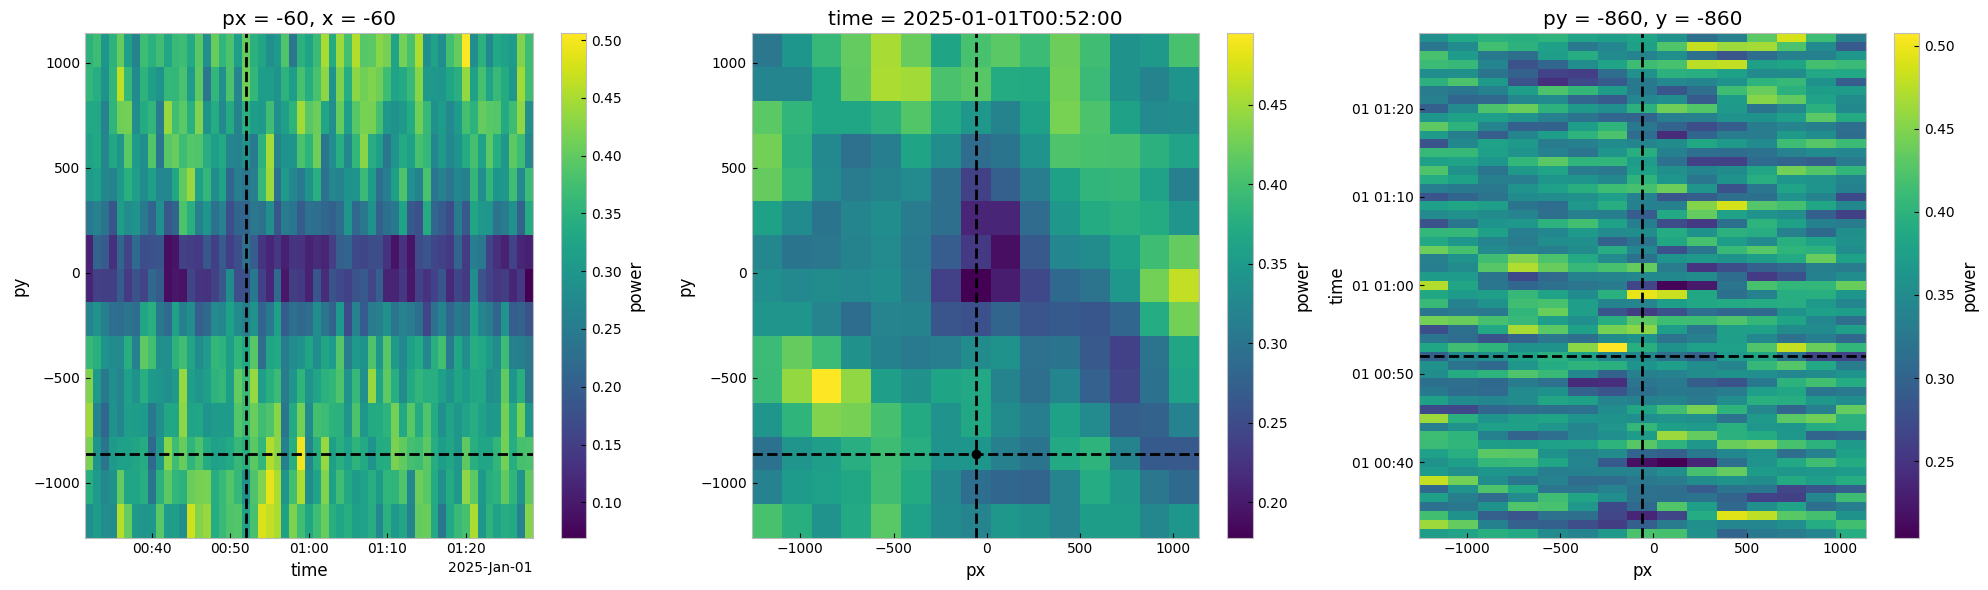

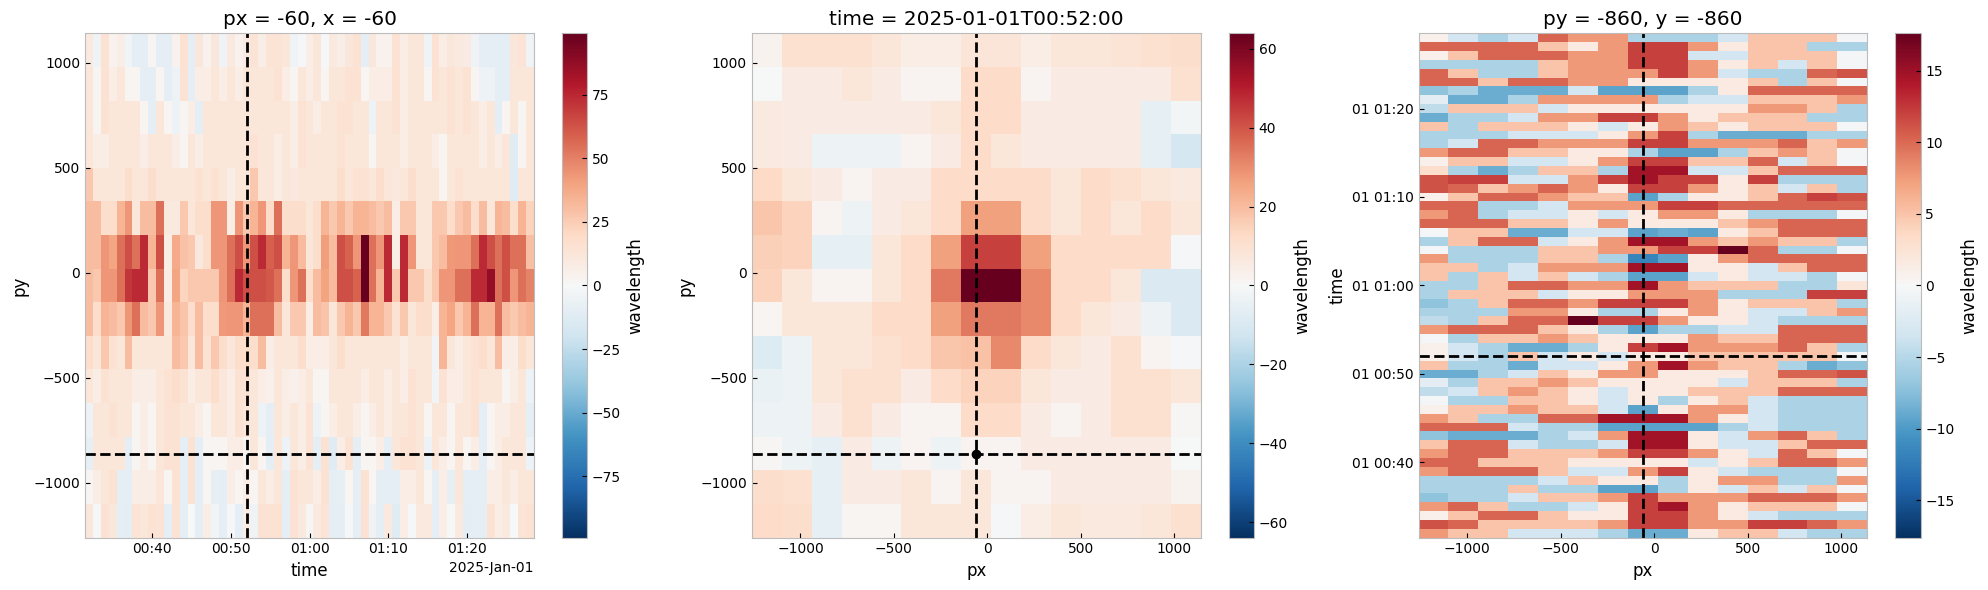

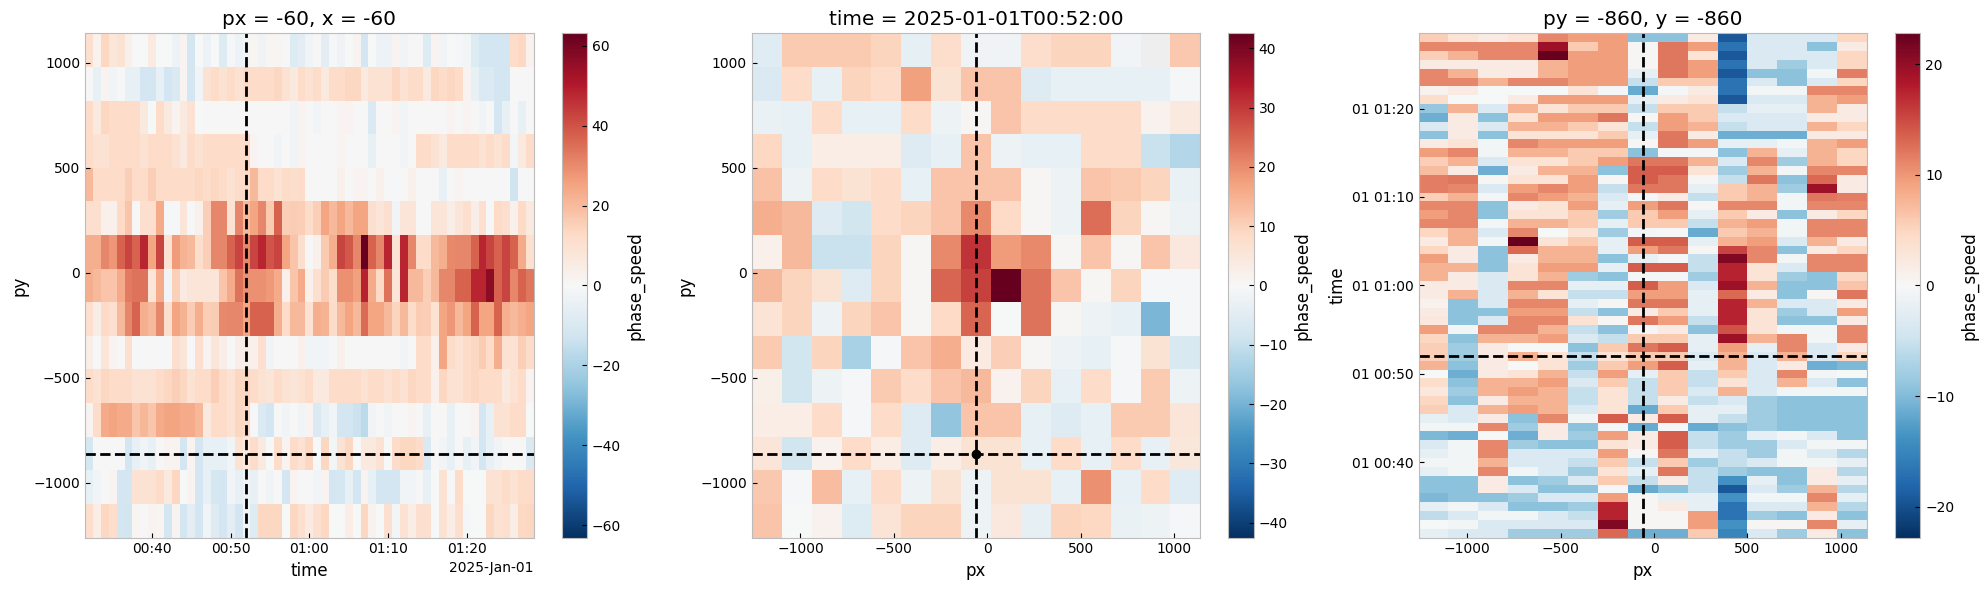

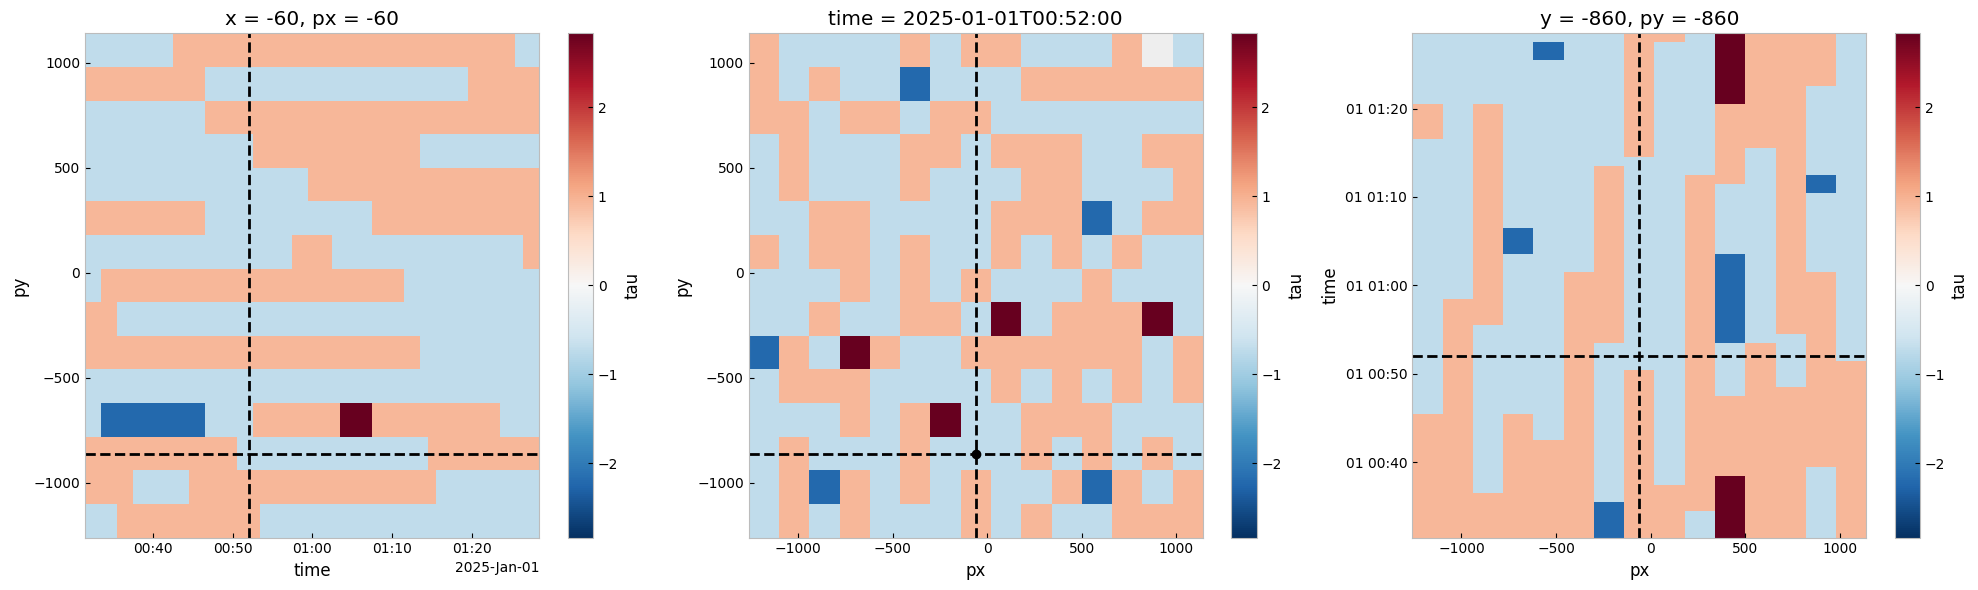

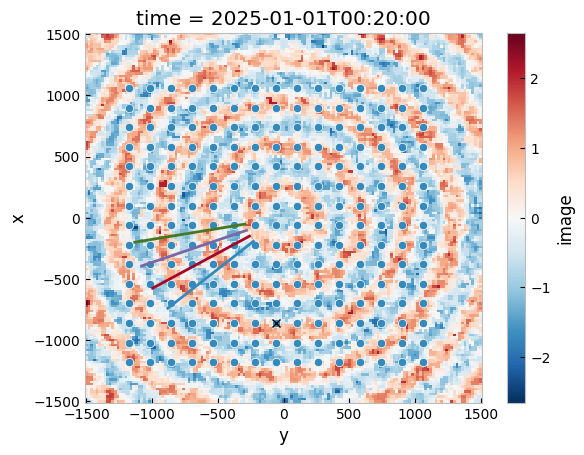

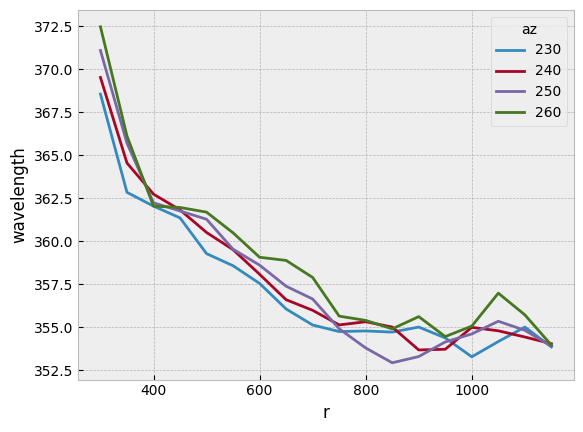

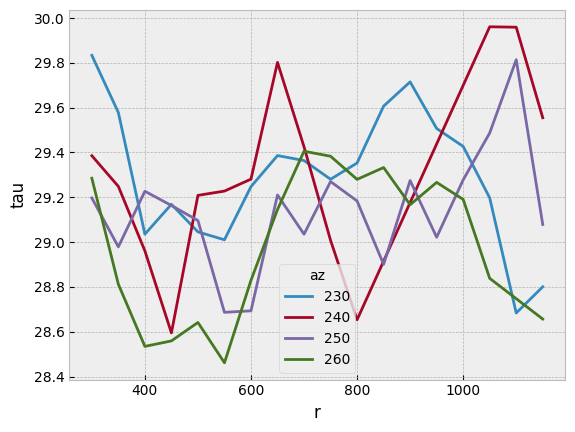

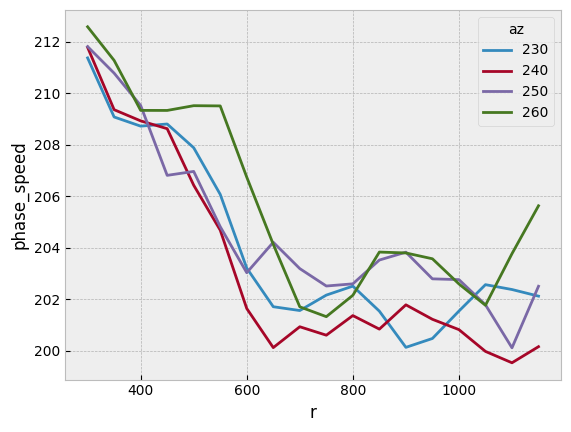

In [6]:
# PHASE PLOTS
def plot_param_3plane(name, TI, XI, YI, val):
    fig, ax = plt.subplots(1, 3, figsize=(20, 6), tight_layout=True)
    (params[name] - val).isel(px=XI).plot(ax=ax[0], x="time", y="py")
    ax[0].axvline(params.time[TI].values, c="k", linestyle="--")
    ax[0].axhline(params.py[YI].values, c="k", linestyle="--")
    (params[name] - val).isel(time=TI).plot(ax=ax[1], x="px", y="py")
    ax[1].axvline(params.px[XI].values, c="k", linestyle="--")
    ax[1].axhline(params.py[YI].values, c="k", linestyle="--")
    ax[1].plot(params.px[XI].values, params.py[YI].values, 'ko')
    (params[name] - val).isel(py=YI).plot(ax=ax[2], x="px", y="time")
    ax[2].axvline(params.px[XI].values, c="k", linestyle="--")
    ax[2].axhline(params.time[TI].values, c="k", linestyle="--")


XI = 7
YI = 2
# TI = 90
TI = 20

## PATCH
fig, ax = plt.subplots(1, 4, figsize=(24, 6), tight_layout=True)
data.image.isel(time=TI).plot(ax=ax[0])
data.image.isel(time=TI).rolling(x=3, y=3, center=True, min_periods=1).median().plot(ax=ax[1])
params.plot.scatter(x="px", y="py", add_labels=False, ax=ax[1])
ax[1].plot(params.px[XI], params.py[YI], 'kx')
patches.image.isel(px=XI, py=YI, time=TI, kx=slice(32), ky=slice(32)).plot(ax=ax[2])
patches.power.isel(px=XI, py=YI, time=TI).sortby("kx").sortby("ky").plot(ax=ax[3])
ax[3].plot(params.power.isel(px=XI, py=YI, time=TI).kx, params.power.isel(px=XI, py=YI, time=TI).ky, 'rx')

## PARAMS
plot_param_3plane("power", TI, XI, YI, 0)
plot_param_3plane("wavelength", TI, XI, YI, wavelength)
plot_param_3plane("phase_speed", TI, XI, YI, phase_speed)

## TAU
fig, ax = plt.subplots(1, 3, figsize=(20, 6), tight_layout=True)
(tau["tau"]-period).isel(px=XI).plot(ax=ax[0], x="time", y="py")
ax[0].axvline(tau.time[TI].values, c="k", linestyle="--")
ax[0].axhline(tau.py[YI].values, c="k", linestyle="--")
(tau["tau"]-period).isel(time=TI).plot(ax=ax[1], x="px", y="py")
ax[1].axvline(tau.px[XI].values, c="k", linestyle="--")
ax[1].axhline(tau.py[YI].values, c="k", linestyle="--")
ax[1].plot(tau.px[XI].values, tau.py[YI].values, 'ko')
(tau["tau"]-period).isel(py=YI).plot(ax=ax[2], x="px", y="time")
ax[2].axvline(tau.px[XI].values, c="k", linestyle="--")
ax[2].axhline(tau.time[TI].values, c="k", linestyle="--")

az_coords = np.arange(230, 270, 10)
range_coords = np.arange(300, 1200, 50)
cx0, cy0 = data.center.values[0], data.center.values[1]  # TID center
lines_x, lines_y = gnss_tid.parameter.get_line_coordinates(cx0, cy0, az_coords, range_coords)
lines_x = xarray.DataArray(
    lines_x, coords={"r": range_coords, "az": az_coords}, dims=["r", "az"]
)
lines_y = xarray.DataArray(
    lines_y, coords={"r": range_coords, "az": az_coords}, dims=["r", "az"]
)

plt.figure()
data.image.isel(time=TI).plot()
params.plot.scatter(x="px", y="py", add_labels=False)
plt.plot(params.px[XI], params.py[YI], 'kx')
plt.plot(lines_x, lines_y)
plt.figure()
params.wavelength.interp(px=lines_x, py=lines_y).median("time").plot(hue="az")
plt.figure()
t = tau.tau.interp(px=lines_x, py=lines_y).median("time")
t.plot(hue="az")
plt.figure()
params.phase_speed.interp(px=lines_x, py=lines_y).median("time").plot(hue="az")


<xarray.DataArray 'power' (time: 57)> Size: 456B
array([273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273,
       273, 273, 273, 273, 273, 273, 274, 274, 274, 274, 274, 274, 274,
       274, 274, 274, 274, 274, 274, 274, 274, 274, 274, 274, 274, 274,
       274, 274, 274, 274, 273, 273, 273, 273, 273, 273, 273, 273, 273,
       273, 273, 273, 273, 273])
Coordinates:
    x        int64 8B -60
    y        int64 8B -860
  * time     (time) datetime64[ns] 456B 2025-01-01T00:32:00 ... 2025-01-01T01...
    px       int64 8B -60
    py       int64 8B -860

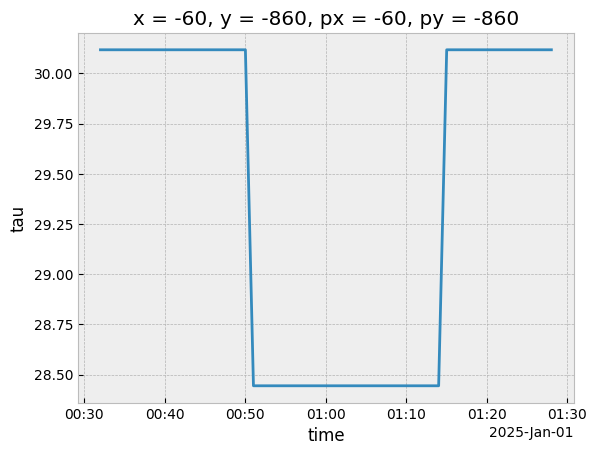

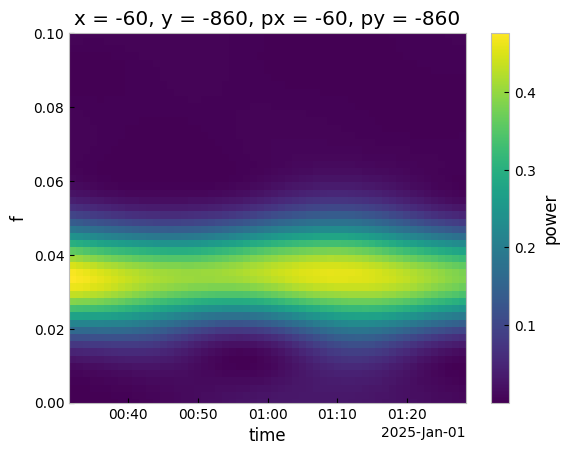

In [7]:
# tau.windows.isel(px=XI, py=YI, time=TI).plot()
plt.figure()
tau.tau.isel(px=XI, py=YI).plot()
plt.figure()
tau.power.isel(px=XI, py=YI).T.plot()
plt.ylim([0, .1])
tau.power.isel(px=XI, py=YI).argmax("f")